### Description of data

Download data only for relevant columns so that the data volume is manageable. These are the recommended fields: 
- created_date,
- unique_key,
- complaint_type, 
- incident_zip,
- incident_address,
- street_name,
- address_type,
- city,
- resolution_description, 
- borough,
- latitude,
- longitude,
- closed_date,
- location_type, 
- status

- Created Date = Date SR was created 
- Unique Key = Unique identifier of a Service Request (SR) in the open data set 
- Complaint Type = This is the first level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone.
- Incident Zip = Incident location zip code, provided by geo validation. 
- Incident Address = House number of incident address provided by submitter. 
- Street Name	= Street name of incident address provided by the submitter 
- Address Type = Type of incident location information available. 
- City = City of the incident location provided by geovalidation. 
- Resolution Description = Describes the last action taken on the SR by the responding agency. May describe next or future steps. 
- Borough	= Provided by the submitter and confirmed by geovalidation. 
- Latitude = Geo based Lat of the incident location
- Longitude = Geo based Long of the incident location 
- Closed Date	= Date SR was closed by responding agency 
- Location Type = Describes the type of location used in the address information
- Status = Status of SR submitted 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.25)

pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [2]:
df = pd.read_csv("nyc1.csv", parse_dates=True, infer_datetime_format=True, low_memory=False)

In [3]:
df.head()

,unique_key,created_date,closed_date,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,resolution_description,borough,latitude,longitude
0,45539970,2020-02-03T11:34:00.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11694.0,180 BEACH 117 STREET,BEACH 117 STREET,ADDRESS,Rockaway Park,Open,The following complaint conditions are still o...,QUEENS,40.578958,-73.837773
1,45540031,2020-02-03T15:42:43.000,NaN,PLUMBING,RESIDENTIAL BUILDING,10035.0,1900 LEXINGTON AVENUE,LEXINGTON AVENUE,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.800055,-73.940585
2,45539181,2020-02-03T12:53:54.000,NaN,ELECTRIC,RESIDENTIAL BUILDING,10466.0,4040 CARPENTER AVENUE,CARPENTER AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.890607,-73.862283
3,45538988,2020-02-03T05:53:31.000,2020-02-03T16:54:52.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,10461.0,1185 NEILL AVENUE,NEILL AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.855078,-73.852492
4,45540022,2020-02-03T18:01:48.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10468.0,2523 UNIVERSITY AVENUE,UNIVERSITY AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.866135,-73.902726


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
unique_key                100000 non-null int64
created_date              100000 non-null object
closed_date               91976 non-null object
complaint_type            100000 non-null object
location_type             100000 non-null object
incident_zip              99957 non-null float64
incident_address          100000 non-null object
street_name               100000 non-null object
address_type              100000 non-null object
city                      99963 non-null object
status                    100000 non-null object
resolution_description    99956 non-null object
borough                   100000 non-null object
latitude                  99957 non-null float64
longitude                 99957 non-null float64
dtypes: float64(3), int64(1), object(11)
memory usage: 11.4+ MB


### Create a dataframe containing only Heat/Hot Water

In [5]:
df2 = df[df['complaint_type'] == "HEAT/HOT WATER"]

In [6]:
df2.head()

,unique_key,created_date,closed_date,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,resolution_description,borough,latitude,longitude
0,45539970,2020-02-03T11:34:00.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11694.0,180 BEACH 117 STREET,BEACH 117 STREET,ADDRESS,Rockaway Park,Open,The following complaint conditions are still o...,QUEENS,40.578958,-73.837773
3,45538988,2020-02-03T05:53:31.000,2020-02-03T16:54:52.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,10461.0,1185 NEILL AVENUE,NEILL AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.855078,-73.852492
4,45540022,2020-02-03T18:01:48.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10468.0,2523 UNIVERSITY AVENUE,UNIVERSITY AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.866135,-73.902726
6,45539200,2020-02-03T08:59:51.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11416.0,75-13 101 AVENUE,101 AVENUE,ADDRESS,Ozone Park,Open,The following complaint conditions are still o...,QUEENS,40.679780,-73.861803
7,45539035,2020-02-03T06:54:49.000,2020-02-03T17:06:54.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,10463.0,3150 BAILEY AVENUE,BAILEY AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.878790,-73.901771


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49540 entries, 0 to 99999
Data columns (total 15 columns):
unique_key                49540 non-null int64
created_date              49540 non-null object
closed_date               48754 non-null object
complaint_type            49540 non-null object
location_type             49540 non-null object
incident_zip              49528 non-null float64
incident_address          49540 non-null object
street_name               49540 non-null object
address_type              49540 non-null object
city                      49531 non-null object
status                    49540 non-null object
resolution_description    49520 non-null object
borough                   49540 non-null object
latitude                  49528 non-null float64
longitude                 49528 non-null float64
dtypes: float64(3), int64(1), object(11)
memory usage: 6.0+ MB


In [9]:
df2.shape

(49540, 15)

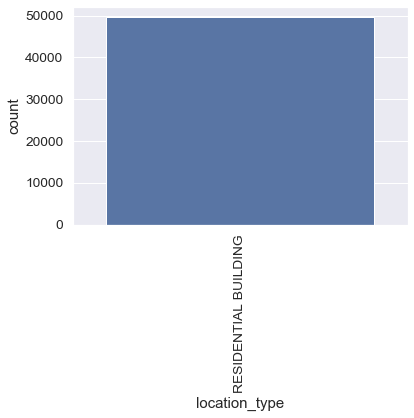

In [10]:
sns.countplot(x='location_type',data=df2)
plt.xticks(rotation=90)
plt.show()

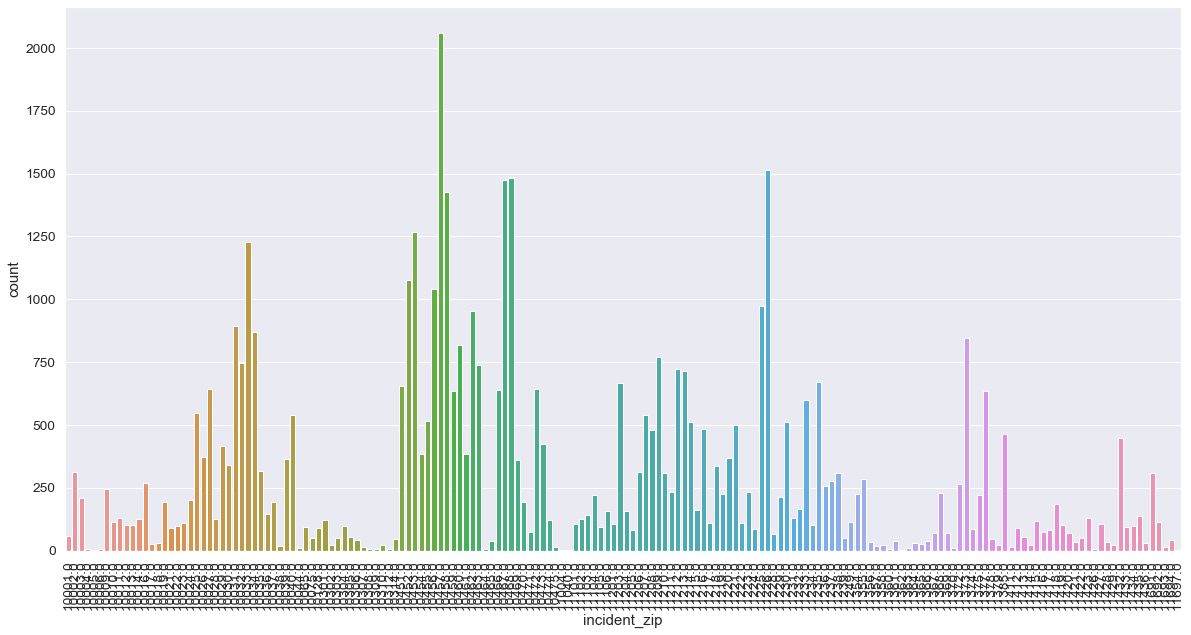

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x='incident_zip',data=df2)
plt.xticks(rotation=90)
plt.show()

In [13]:
df2['incident_zip'].value_counts()

10457.0    2060
11226.0    1514
10468.0    1484
10467.0    1474
10458.0    1428
           ... 
11362.0       3
10005.0       3
11040.0       2
11004.0       1
11697.0       1
Name: incident_zip, Length: 174, dtype: int64

In [14]:
df2['street_name'].value_counts()

TIEBOUT AVENUE       1085
GRAND CONCOURSE       927
ELMHURST AVENUE       632
SHORE ROAD            472
SHERMAN AVENUE        458
                     ... 
SOUTH    5 STREET       1
EAST 179 STREET         1
BRITTON AVENUE          1
BAILEY PLACE            1
158 STREET              1
Name: street_name, Length: 2513, dtype: int64

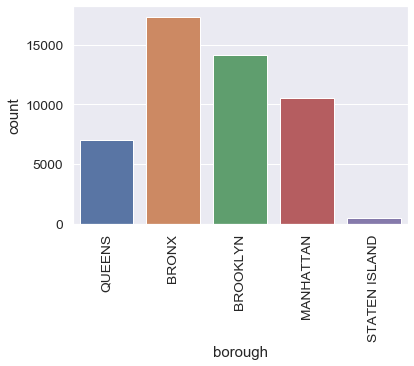

In [16]:
sns.countplot(x='borough',data=df2)
plt.xticks(rotation=90)
plt.show()

In [17]:
df3 = df2[df2['street_name'] == 'TIEBOUT AVENUE']

In [18]:
df3

,unique_key,created_date,closed_date,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,resolution_description,borough,latitude,longitude
176,45539981,2020-02-03T15:34:13.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.854439,-73.898423
178,45537717,2020-02-03T16:32:36.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.854439,-73.898423
286,45532793,2020-02-03T18:17:51.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.854439,-73.898423
357,45536755,2020-02-03T03:38:09.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.854439,-73.898423
378,45534790,2020-02-03T06:24:02.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.854439,-73.898423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98634,45155743,2019-12-13T06:56:43.000,2019-12-14T11:34:46.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Closed,The complaint you filed is a duplicate of a co...,BRONX,40.854439,-73.898423
98635,45155714,2019-12-13T12:25:25.000,2019-12-14T11:34:46.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Closed,The complaint you filed is a duplicate of a co...,BRONX,40.854439,-73.898423
98641,45155118,2019-12-13T13:37:03.000,2019-12-14T11:34:46.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Closed,The complaint you filed is a duplicate of a co...,BRONX,40.854439,-73.898423
98643,45155098,2019-12-13T10:32:10.000,2019-12-14T11:34:46.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,10457.0,2176 TIEBOUT AVENUE,TIEBOUT AVENUE,ADDRESS,BRONX,Closed,The complaint you filed is a duplicate of a co...,BRONX,40.854439,-73.898423


### Conclusion

**Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?**

Area to focus lies in Bronx borough, Tiebout Avenue street, Zip code is 10457

In [19]:
# Save to new csv
#df2.to_csv('nycheat.csv',index=False)